In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', '.venv', 'app.py', 'background.jpg', 'Data', 'Heart.h5', 'Heart.ipynb', 'Heart.pkl', 'Heart_model.keras']


In [7]:
dataset = pd.read_csv("Data/heart_statlog_cleveland_hungary_final.csv")

In [8]:

type(dataset)

pandas.core.frame.DataFrame

In [9]:

dataset.shape

(1190, 12)

In [10]:
dataset.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [11]:

dataset.sample(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
16,38,1,4,110,196,0,0,166,0,0.0,2,1
1153,52,1,4,128,204,1,0,156,1,1.0,2,1
326,42,1,4,105,0,1,0,128,1,-1.5,3,1
205,56,1,2,130,184,0,0,100,0,0.0,1,0
1150,44,1,3,120,226,0,0,169,0,0.0,1,0


In [12]:

dataset.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [14]:
dataset["target"].describe()

count    1190.000000
mean        0.528571
std         0.499393
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [15]:

dataset["target"].unique()

array([0, 1], dtype=int64)

In [16]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
max heart rate         0.413278
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
cholesterol            0.198366
resting bp s           0.121415
resting ecg            0.073059
Name: target, dtype: float64


target
1    629
0    561
Name: count, dtype: int64


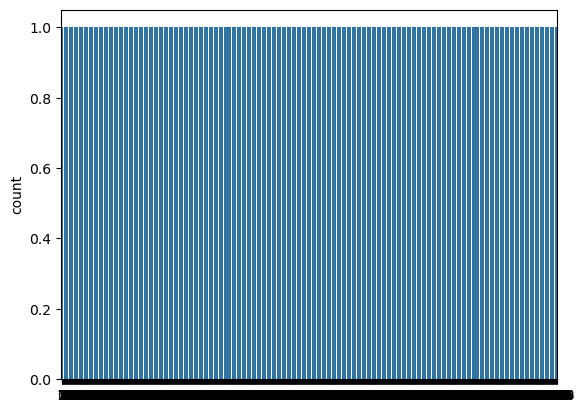

In [17]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [18]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 185.15
Percentage of patience with heart problems: 207.59


In [19]:

dataset["sex"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='sex', ylabel='target'>

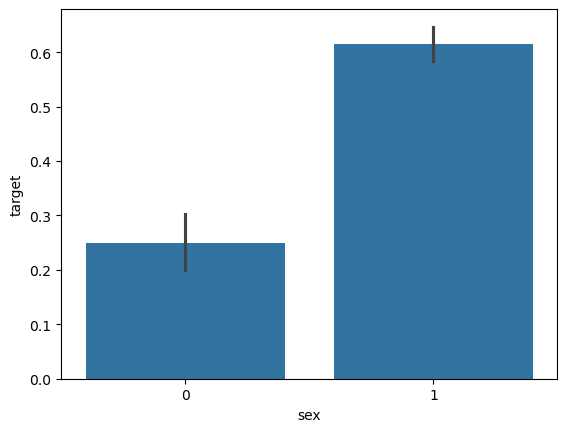

In [20]:
sns.barplot(x=dataset["sex"], y=y)


In [21]:
dataset["chest pain type"].unique()


array([2, 3, 4, 1], dtype=int64)

<Axes: xlabel='chest pain type', ylabel='target'>

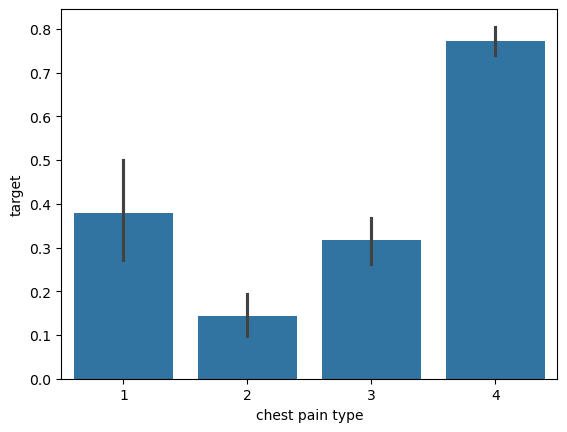

In [22]:

sns.barplot(x=dataset["chest pain type"],y=y)

In [23]:

dataset["fasting blood sugar"].describe()

count    1190.000000
mean        0.213445
std         0.409912
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fasting blood sugar, dtype: float64

In [24]:
dataset["fasting blood sugar"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='fasting blood sugar', ylabel='target'>

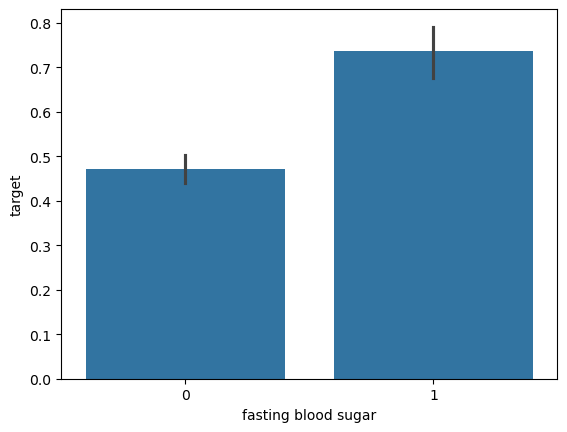

In [25]:

sns.barplot(x=dataset["fasting blood sugar"],y=y)

In [26]:
dataset["resting ecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='resting ecg', ylabel='target'>

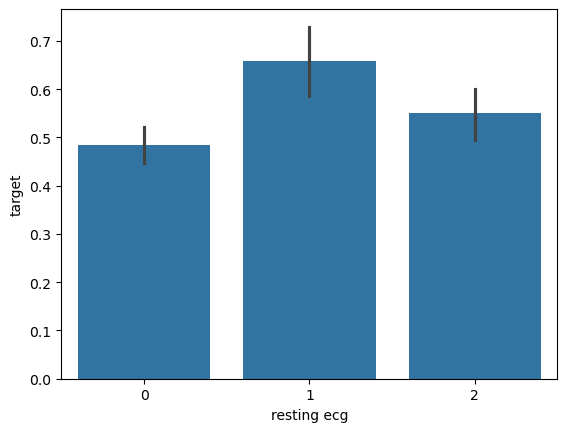

In [27]:

sns.barplot(x=dataset["resting ecg"],y=y)

In [28]:
dataset["exercise angina"].unique()


array([0, 1], dtype=int64)

<Axes: xlabel='exercise angina', ylabel='target'>

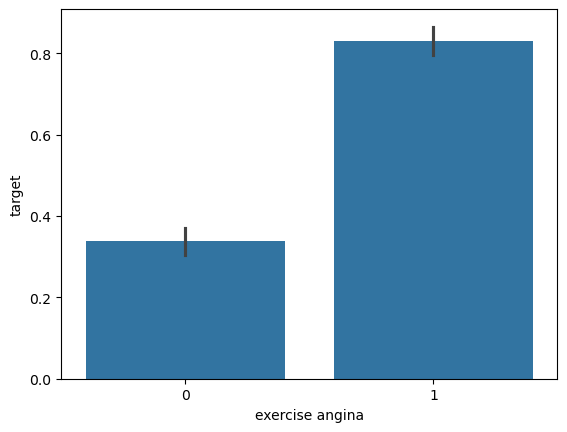

In [29]:

sns.barplot(x=dataset["exercise angina"],y=y)

In [30]:

dataset["ST slope"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='ST slope', ylabel='target'>

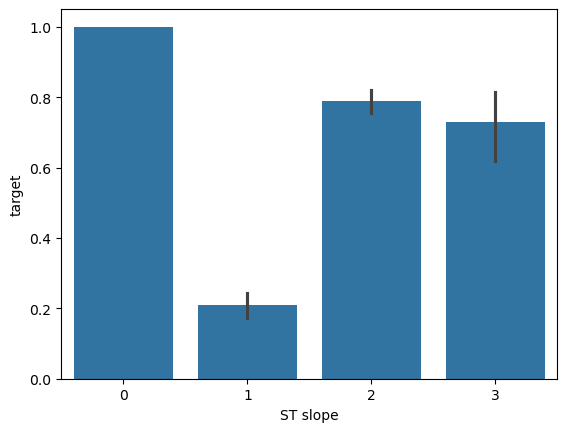

In [31]:
sns.barplot(x=dataset["ST slope"],y=y)

<Axes: ylabel='count'>

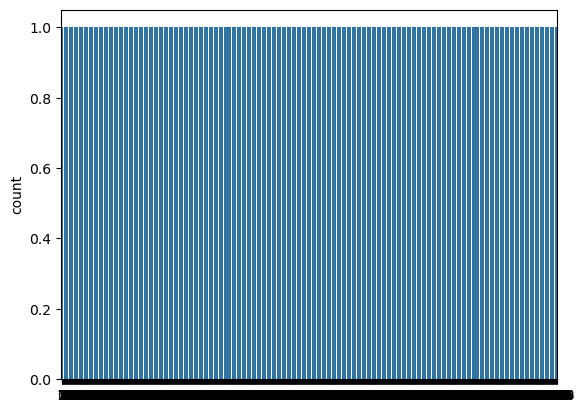

In [32]:

sns.countplot(dataset["chest pain type"])

<Axes: xlabel='chest pain type', ylabel='target'>

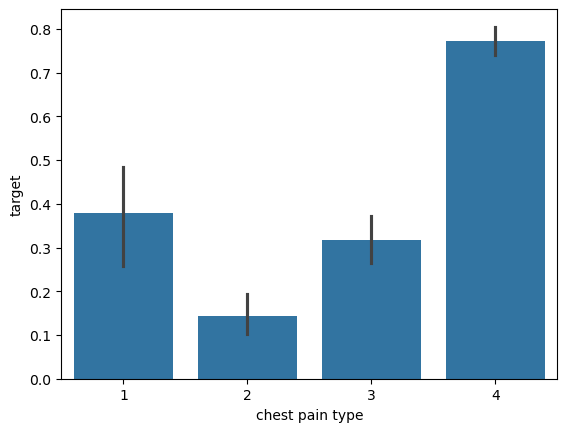

In [33]:
sns.barplot(x=dataset["chest pain type"],y=y)

<Axes: xlabel='max heart rate', ylabel='Density'>

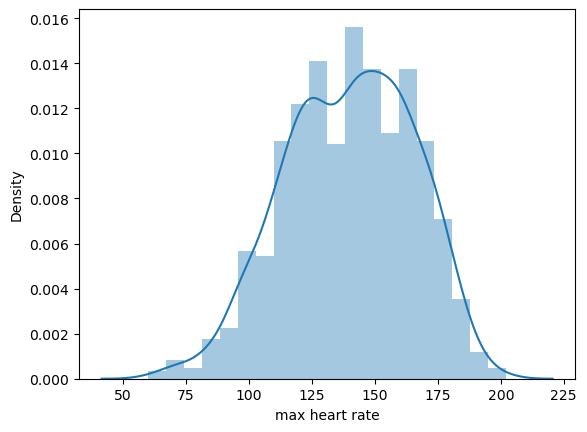

In [34]:
sns.distplot(dataset["max heart rate"])

In [35]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [36]:

X_train.shape

(952, 11)

In [37]:

X_test.shape

(238, 11)

In [38]:

Y_train.shape

(952,)

In [39]:

Y_test.shape

(238,)

In [40]:

from sklearn.metrics import accuracy_score

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [42]:

Y_pred_lr.shape

(238,)

In [43]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.25 %


In [44]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [45]:
Y_pred_nb.shape

(238,)

In [46]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.29 %


In [47]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [48]:

Y_pred_svm.shape

(238,)

In [49]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 80.25 %


In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [51]:

Y_pred_knn.shape

(238,)

In [52]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.49 %


In [53]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)


In [54]:

print(Y_pred_dt.shape)

(238,)


In [55]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 88.24 %


In [56]:
from keras.models import Sequential
from keras.layers import Dense

In [57]:
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(11,)),  # Change 13 to 11
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])


In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=300)


Epoch 1/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5521 - loss: 3.3758
Epoch 2/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6666 - loss: 0.7526
Epoch 3/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7142 - loss: 0.5912
Epoch 4/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7559 - loss: 0.5307 
Epoch 5/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7210 - loss: 0.5643
Epoch 6/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7565 - loss: 0.5210
Epoch 7/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7216 - loss: 0.5665
Epoch 8/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7828 - loss: 0.5014
Epoch 9/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7750 - loss: 0.4766
Epoch 10/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7781 - loss: 0.4934
Epoch 11/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7047 - loss: 0.6016
Epoch 12/300
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [59]:

Y_pred_nn = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [60]:
Y_pred_nn.shape

(238, 1)

In [61]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [62]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 80.25 %


In [63]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [64]:

Y_pred_xgb.shape

(238,)

In [65]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 92.44 %


In [66]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 80.25 %
The accuracy score achieved using Naive Bayes is: 85.29 %
The accuracy score achieved using Support Vector Machine is: 80.25 %
The accuracy score achieved using K-Nearest Neighbors is: 68.49 %
The accuracy score achieved using Decision Tree is: 88.24 %
The accuracy score achieved using XGBoost is: 92.44 %
The accuracy score achieved using Neural Network is: 80.25 %


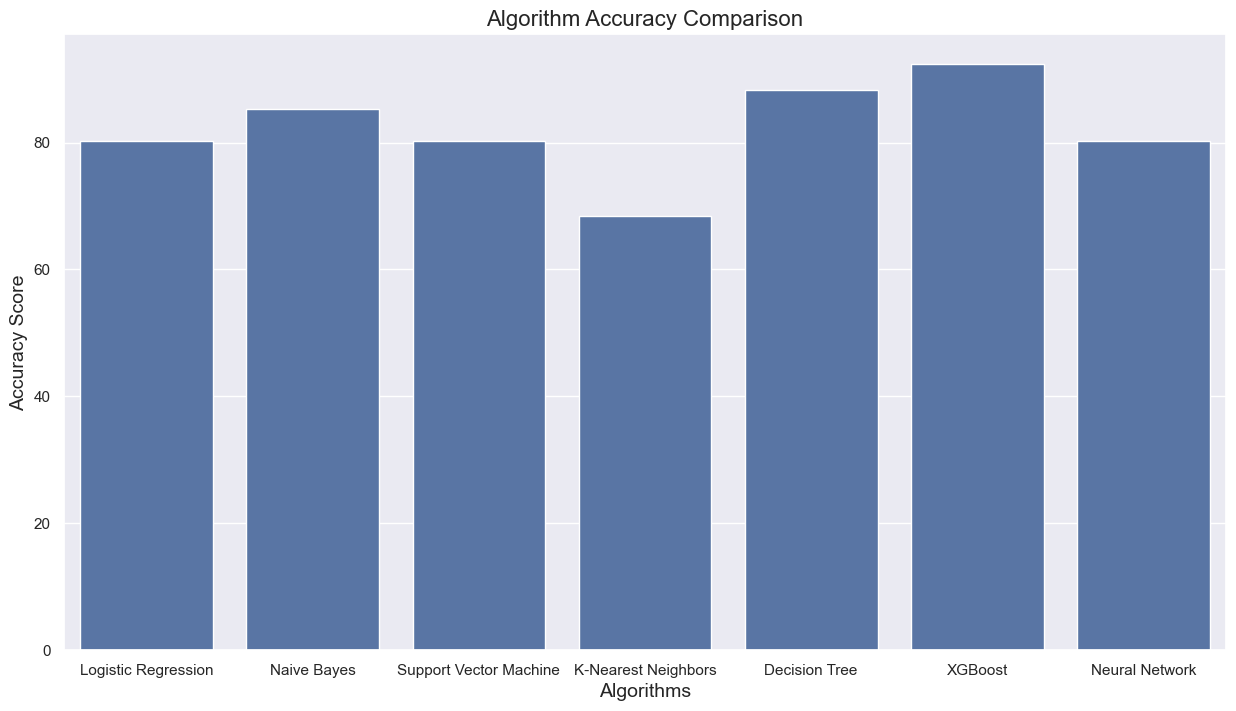

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
sns.set(rc={'figure.figsize': (15, 8)})

# Add labels for the axes
plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)

# Create a barplot
sns.barplot(x=algorithms, y=scores)

# Add a title for the plot (optional)
plt.title("Algorithm Accuracy Comparison", fontsize=16)

# Show the plot
plt.show()


In [138]:
import pickle
import os

# Define the path to your saved model
model_path = 'xgboost_model.pkl'  # Replace with your actual model file path

# Check if the model file exists
if os.path.exists(model_path):
    # Load the model from the file
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    print("Model loaded successfully.")
else:
    print(f"Error: The model file '{model_path}' does not exist. Please provide the correct file path.")


Error: The model file 'xgboost_model.pkl' does not exist. Please provide the correct file path.


In [142]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import pickle

# Load your dataset (replace 'your_dataset.csv' with your file path)
data = pd.read_csv('Data/heart_statlog_cleveland_hungary_final.csv')

# Assuming the last column is the target and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2%}")

# Save the trained model to a pickle file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'xgboost_model.pkl'")


Model accuracy: 92.86%
Model saved as 'xgboost_model.pkl'
